### Descompactando o zip e renomeando a base de dados


In [ ]:
!unzip archive.zip
!mv "Inequality in Education.csv" "Inequality_in_Education.csv"

Archive:  archive.zip
  inflating: Inequality in Education.csv  


### Importando bibliotecas e fazendo a leitura do arquivo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("Inequality_in_Education.csv")
df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


### Retirando da análise todos os dados nulos

In [ ]:
df = df.dropna(how='any')
df_columns = df.columns

df_regions = list(df["UNDP Developing Regions"].unique())

df_inequality = df.loc[:, 'Inequality in Education (2010)': 'Inequality in Education (2021)']
df


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
5,ARG,Argentina,Very High,LAC,47.0,6.914310,6.830900,6.430560,6.513360,6.192280,6.331310,6.151940,6.208430,5.951810,5.787290,5.787290,5.787290
6,ARM,Armenia,High,ECA,85.0,3.685000,3.685000,3.685000,3.685000,3.685000,3.685000,2.934950,2.934950,2.934950,2.934950,2.934950,2.934950
10,AZE,Azerbaijan,High,ECA,91.0,3.727167,3.731171,3.702155,3.515670,3.491246,3.537645,3.549497,3.565062,3.565062,3.565062,3.565062,3.565062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,Venezuela,Medium,LAC,120.0,17.532918,13.359263,13.359263,13.359263,13.359263,14.283637,8.670590,8.670590,8.670590,8.670590,8.670590,8.670590
188,VNM,Viet Nam,High,EAP,115.0,16.578150,16.578150,16.578150,16.578150,17.639460,17.639460,17.639460,17.639460,17.639460,17.639460,15.254790,15.254790
191,YEM,Yemen,Low,AS,183.0,48.090120,48.090120,48.090120,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650,46.137650
193,ZMB,Zambia,Medium,SSA,154.0,23.760000,23.760000,23.760000,23.760000,21.734910,21.734910,21.734910,21.734910,20.435720,20.435720,20.435720,20.435720


### Retirando a média da desigualdade nos períodos de 2010 a 2021

In [ ]:
df_mean_inequality_by_year = df_inequality.mean()
df_mean_inequality_by_year.describe()

count    12.000000
mean     24.563111
std       0.797119
min      23.726671
25%      23.787219
50%      24.407020
75%      25.119559
max      25.932120
dtype: float64

### Plotando o gráfico para análise

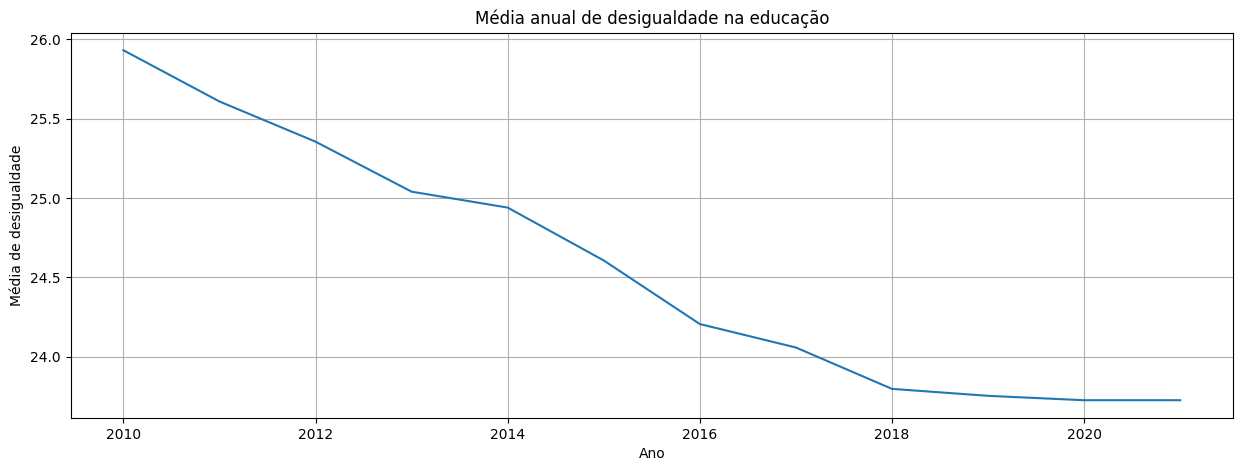

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Média anual de desigualdade na educação")
plt.xlabel("Ano")
plt.ylabel("Média de desigualdade")
plt.plot(range(2010,2022), df_mean_inequality_by_year.values)
plt.grid()
plt.show()

### Fazendo análise entre a correlação entre países com maior indíce de desenvolvimento humanitário e desigualdade

In [ ]:
df_group = df.groupby('UNDP Developing Regions').mean()

df_group = df_group.loc[:, 'Inequality in Education (2010)': 'Inequality in Education (2021)']

for i in range(2010,2022):
  i = str(i)
  df_group.rename(columns={f'Inequality in Education ({i})': i}, inplace=True)

<ipython-input-8-4b6bdcf8d1d1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby('UNDP Developing Regions').mean()


### Plotando o gráfico

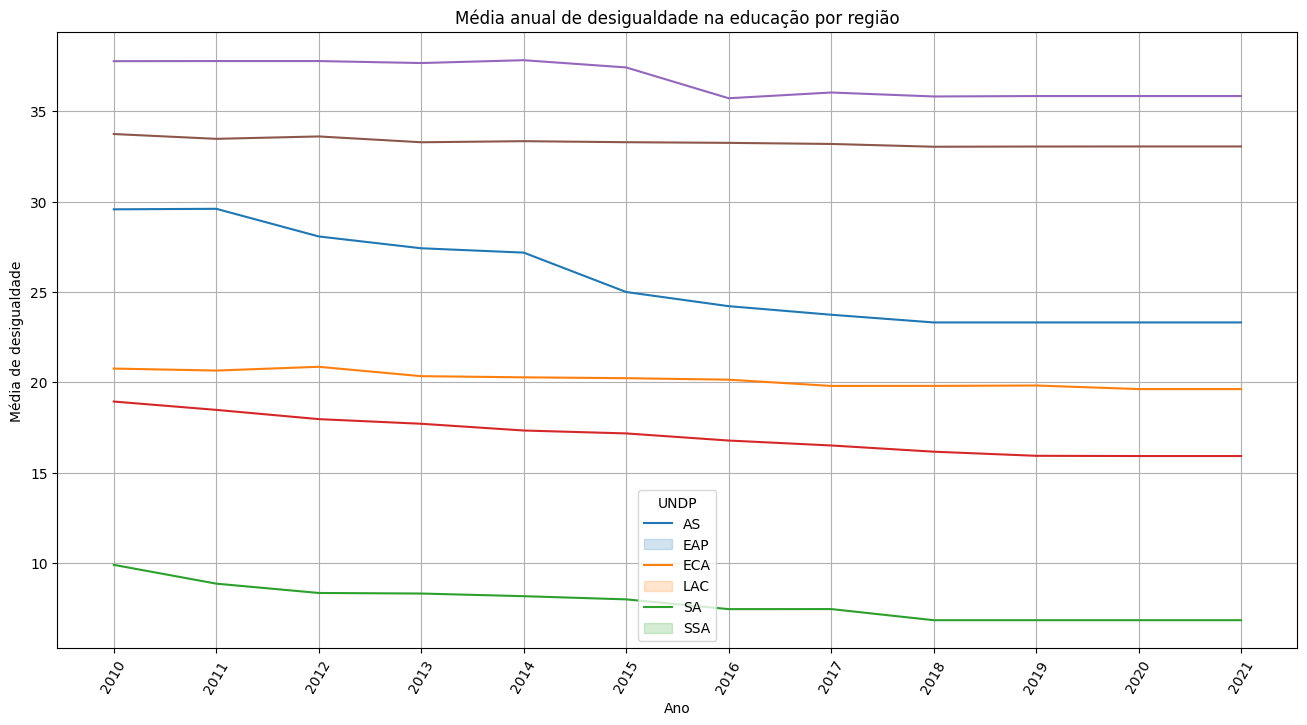

In [ ]:
plt.figure(figsize=(16,8))
sb.lineplot(data=df_group.T, dashes=False)
plt.title("Média anual de desigualdade na educação por região")
plt.xlabel("Ano")
plt.xticks(rotation=60)
plt.ylabel("Média de desigualdade")
plt.legend(title='UNDP', labels=df_group.index,)
plt.grid()
plt.show()

### Resultado

A partir da análise foi vista que países com desenvolvimento humanitário mais elevado contém menor taxa de desigualdade social.